**H20 AutoML Analysis for Heart Disease Detection**
Tarun Angrish, Nik Bear Brown



**Abstract**
An abstract is:

What is the question?
What did you do?
What were the results?

The goal of this assignment is to construct a realistic model which can be utilised to predict the occurence of Heart Disease, in a patient by gathering insights from various tests on subject data. For this dataset, price is the dependent variable and there are 12 other independent variables, which have been collected after running clinical tests and listed accordingly, by a group of doctors.

Through the data analysis and test it can be summarized that the linear regression model and deep learning model can effectively predict and analyze the presence of Heart Disease in a patient to some extent, while the algorithm can still be improved through more advanced machine learning methods.

**Dataset:**

#### Description of the variables present in the dataset:

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)


**Importing Libraries and H20 Initialisation**

Automated machine learning (AutoML) refers to the automation of the entire process of applying machine learning to practical issues. H2O AutoML streamlines tasks such as fundamental data processing, model training and optimization, as well as combining different models through Ensemble and stacking techniques. This approach ensures the creation of high-performing models, allowing developers to concentrate on tasks such as data collection, feature engineering, and model deployment. Below are the steps involved in setting up H2O.

In [ ]:
!rm -rf info6105-dataset
!apt get-install git
!git clone https://github.com/tarunangrish-neu/info6105-dataset.git
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

E: Invalid operation get-install
Cloning into 'info6105-dataset'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 11.25 KiB | 11.25 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=f985715e1f8bbe454e702b701480ff0765f891056859a3b01f38ced70f384120
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
min_mem_size=6
run_time=222

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [ ]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:45770..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpc1yrnt93
  JVM stdout: /tmp/tmpc1yrnt93/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpc1yrnt93/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:45770
Connecting to H2O server at http://127.0.0.1:45770 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_mk1wqy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


**Importing Data**

Below we are using Github repository to provide a link to the dataset:

In [ ]:
url = 'https://raw.githubusercontent.com/tarunangrish-neu/info6105-dataset/main/heart-disease-dataset-processed.csv'
df = h2o.import_file(path = url)
dff = pd.read_csv('/content/info6105-dataset/heart-disease-dataset-processed.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
dff.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


**Understanding the data in the dataset**

In [ ]:
dff.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
df.types

{'age': 'int',
 'sex': 'int',
 'cp': 'int',
 'trestbps': 'int',
 'chol': 'int',
 'fbs': 'int',
 'restecg': 'int',
 'thalach': 'int',
 'exang': 'int',
 'oldpeak': 'real',
 'slope': 'int',
 'ca': 'int',
 'thal': 'int',
 'target': 'int'}

In [ ]:
df.shape

(303, 14)

In [ ]:
#Creating a 80:20 test-train split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(243, 14)
(60, 14)


In [ ]:
#Displaying all the column names in the variable X
X=df.columns
print(X)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [ ]:
#Separating Target variable from the independent variables' column
y_numeric ='target'
X.remove(y_numeric)
print(X)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
dfpd = pd.read_csv('https://raw.githubusercontent.com/tarunangrish-neu/info6105-dataset/main/heart-disease-dataset-processed.csv')



```
**Run AutoML here**
Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time specified by the user. This can be set by the said argument.


```

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |████
02:03:02.224: GBM_1_AutoML_1_20231103_20250 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20231103_20250.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 194.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 194.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 194.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 195.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 195.0.


█████████████████████████████████████

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20231103_20250_model_20


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    49                 49                          6456                   3            4            3.53061       4             7             5.81633

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.5070773654866942
RMSE: 0.7120936493795561
MAE: 0.5357152447315248
RMSLE: 0.3423115205572643
Mean Residual Deviance: 0.5070773654866942

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.7007587602961074
RMSE: 0.8371133497299559
MAE: 0.6308463209005529
RMSLE: 0.3970205026545029
Mean Residual Deviance: 0.7007587602961074

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.633128  0.0845159  0.664106      0.706829      0.538214      0.54724       0.709252
mean_residual_deviance  0.705163  0.124799   0.782482      0.777145      0.487651      0.711867      0.766671
mse                     0.705163  0.124799   0.782482      0.777145      0.487651      0.711867      0.766671
r2                      0.519194  0.051688   0.493328      0.597166      0.540482      0.502384      0.462607
residual_deviance       0.705163  0.124799   0.782482      0.777145      0.487651      0.711867      0.766671
rmse                    0.836756  0.0790823  0.88458       0.881558      0.69832       0.843722      0.875598
rmsle                   0.397236  0.0319401  0.418044      0.41967       0.34803       0.381437      0.418997

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-11-03 02:04:52  15.149 sec  0                  1.23058          1.02034         1.51434
    2023-11-03 02:04:52  15.165 sec  5                  1.05861          0.884445        1.12066
    2023-11-03 02:04:52  15.171 sec  10                 0.948786         0.777153        0.900195
    2023-11-03 02:04:52  15.177 sec  15                 0.860501         0.685558        0.740462
    2023-11-03 02:04:52  15.183 sec  20                 0.814066         0.633086        0.662704
    2023-11-03 02:04:52  15.189 sec  25                 0.791025         0.606321        0.625721
    2023-11-03 02:04:52  15.203 sec  30                 0.764814         0.579272        0.58494
    2023-11-03 02:04:52  15.211 sec  35                 0.746103         0.563347        0.55667
    2023-11-03 02:04:52  15.222 sec  40                 0.726682         0.54753         0.528067
    2023-11-03 02:04:52  15.228 sec  45                 0.717184         0.539999        0.514353
    2023-11-03 02:04:52  15.234 sec  49                 0.712094         0.535715        0.507077

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
ca          254.318                1                    0.198373
thal        240.754                0.946665             0.187793
cp          203.659                0.800805             0.158858
oldpeak     174.841                0.687488             0.136379
slope       124.164                0.488221             0.0968499
thalach     111.209                0.437283             0.086745
restecg     49.895                 0.196191             0.038919
age       

**Interpreting the above results**

MAE, denoting the mean absolute error, calculates the average absolute discrepancy between the predicted values and the actual target values. This metric ranges from zero to infinity, where a smaller value signifies a model of higher accuracy and precision in its predictions. Essentially, it provides insight into the typical magnitude of errors made by the model, allowing for a clearer understanding of its performance.

RMSE, standing for root-mean-square error, serves as a widely utilized measure assessing the disparities between the values predicted by a model and the actual observed values. Just like MAE, RMSE ranges from zero to infinity, and a smaller value indicates a model with higher predictive accuracy. RMSE provides a comprehensive view of prediction errors by considering both the magnitude and direction of these errors.

RMSLE, or root-mean-squared logarithmic error, is akin to RMSE, but it introduces a logarithmic transformation to the predicted and actual values before computation. This technique penalizes under-predictions more severely than over-predictions, making it valuable in scenarios where certain deviations are more critical than others. If both the label and predicted values are non-negative, RMSLE is a suitable evaluation metric.

r^2, or r-squared, represents the square of the Pearson correlation coefficient between the actual labels and the predicted values. This metric ranges from zero to one, with a higher value indicating a model of superior quality. r^2 offers insights into how well the model captures the variance in the data, providing a measure of its goodness of fit.

MAPE, standing for mean absolute percentage error, calculates the average absolute percentage difference between the actual labels and the predicted values. Like MAE and RMSE, MAPE provides valuable insights into prediction accuracy. A lower MAPE indicates a model that accurately predicts a higher percentage of values, making it a favorable choice in scenarios where percentage accuracy is crucial.

In the realm of model evaluation techniques, K-fold cross-validation plays a pivotal role. This method enables internal validation without the need for a separate validation split, ensuring a robust assessment of the model's performance across various subsets of the data. By dividing the dataset into K equally sized folds and iteratively using each fold as a validation set while the remaining folds serve as training data, K-fold cross-validation offers a more comprehensive evaluation of the model's generalizability.

Moving forward, the AutoML Leaderboard takes center stage. By specifying a leaderboard_frame in the h2o.automl() function, which contains the data for scoring and ranking the models, the AutoML leaderboard accurately assesses and ranks the models based on their performance on this specified dataset. Each machine learning task—be it binary classification, multiclass classification, or regression—has a default performance metric internally defined. For regression tasks, the default ranking metric is mean residual deviance, ensuring a standardized evaluation across models. This leaderboard functionality is instrumental in identifying the most suitable and proficient machine learning models, allowing for informed decision-making in the model selection process.

In [ ]:
print(aml.leaderboard)

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
GBM_grid_1_AutoML_1_20231103_20250_model_20             0.837113  0.700759  0.630846  0.397021                  0.700759
StackedEnsemble_BestOfFamily_4_AutoML_1_20231103_20250  0.840645  0.706684  0.630997  0.400263                  0.706684
GBM_grid_1_AutoML_1_20231103_20250_model_4              0.844684  0.71349   0.636523  0.401855                  0.71349
StackedEnsemble_BestOfFamily_3_AutoML_1_20231103_20250  0.844992  0.714012  0.634057  0.396934                  0.714012
GBM_grid_1_AutoML_1_20231103_20250_model_11             0.846144  0.71596   0.639269  0.40037                   0.71596
GLM_1_AutoML_1_20231103_20250                           0.84695   0.717324  0.650537  0.418614                  0.717324
StackedEnsemble_AllModels_4_AutoML_1_20231103_20250     0.849333  0.721366  0.650702  0.394777                  0.721366
StackedEnsemble_BestOfFamily_2_Aut

**Analysing relation between all variables**

When all independent variables were plotted against 'target' variable it is observed that for 'ca' and 'thal' roughly a linear line is obtained. So it can be concluded from this plot that variables ca (the presence of major fibrated blood vessels) and thal (presence of a rare blood disease Thalasemmia) have linear relation with the presence of heart disease.

VIF stands for Variance Inflation Factor. It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. We will calculate the VIF value for all variables to check the dependency and then will drop the variables with high VIF value.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Multic = dfpd[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope' , 'ca', 'thal']]
df_for_vif = pd.DataFrame(Multic)
df_cleaned = df_for_vif.replace('?', pd.NA).dropna()

for column in df_cleaned.columns:
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')
vif = pd.DataFrame()
vif["variables"] = df_cleaned.columns

vif["VIF"] = [variance_inflation_factor(df_cleaned.values, i) for i in range(df_cleaned.shape[1])]
vif

,variables,VIF
0,age,42.508056
1,sex,3.822194
2,cp,13.536880
3,trestbps,60.510326
4,chol,26.119369
5,fbs,1.249353
6,restecg,2.167770
7,thalach,34.207039
8,exang,2.038380
9,oldpeak,3.164536


VIF for 'age','cp','trestbps','chol', 'thalach', 'thal' and 'slope' is greater than 10. 'thal' is a important variable and hence, we will keep it for the time being. We will drop the variables age, trestbps and chol.

Ordinary least squares (OLS) regression is a statistical method of analysis used for multivariate model that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable.

In [ ]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('target ~ sex  + cp + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal', data=dfpd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     25.23
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           6.86e-44
Time:                        02:06:35   Log-Likelihood:                -364.41
No. Observations:                 303   AIC:                             760.8
Df Residuals:                     287   BIC:                             820.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3769      0.515     -0.732      0.465      -1.391       0.637
ca[T.1]        0.4480      0.127      3.528      0.000       0.198       0.698
ca[T.2]        0.9697      0.159      6.091      0.000       0.656       1.283
ca[T.3]        1.0990      0.209      5.263      0.000       0.688       1.510
ca[T.?]       -0.1887      0.423     -0.446      0.656      -1.022       0.644
thal[T.6]      0.2210      0.223      0.991      0.322      -0.218       0.660
thal[T.7]      0.5606      0.120      4.663      0.000       0.324       0.797
thal[T.?]      0.5881      0.596      0.987      0.325      -0.585       1.761
sex            0.2137      0.113      1.889      0.060      -0.009       0.436
cp             0.1987      0.057      3.511      0.001       0.087       0.310
fbs           -0.0472      0.138     -0.342      0.732      -0.319       0.224
restecg        0.0979      0.049      2.000      0.046       0.002       0.194
thalach       -0.0043      0.003     -1.705      0.089      -0.009       0.001
exang          0.2382      0.120      1.989      0.048       0.002       0.474
oldpeak        0.1872      0.055      3.421      0.001       0.080       0.295
slope          0.1905      0.101      1.881      0.061      -0.009       0.390
==============================================================================
Omnibus:                       16.286   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.150
Skew:                           0.474   Prob(JB):                     6.94e-05
Kurtosis:                       3.785   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As seen from the OLS summary p-value for 'fbs' and 'thal' is greater than 0.1. An extra variable 'ca' is neccsary as other variables will help us determine the presence of heart-disease. Dropping them will give us a model with all variables whose p-values are less than 0.05. The accuracy for this model is 76.4%. Now will check VIF and p-values again for the selected independent variables.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Multic = dfpd[['sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope' , 'ca', 'thal']]
df_for_vif = pd.DataFrame(Multic)
df_cleaned = df_for_vif.replace('?', pd.NA).dropna()

for column in df_cleaned.columns:
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')
vif = pd.DataFrame()
vif["variables"] = df_cleaned.columns

vif["VIF"] = [variance_inflation_factor(df_cleaned.values, i) for i in range(df_cleaned.shape[1])]
vif

,variables,VIF
0,sex,3.689895
1,cp,12.483398
2,fbs,1.222238
3,restecg,2.089197
4,thalach,12.203208
5,exang,2.012672
6,oldpeak,3.128665
7,slope,10.658976
8,ca,1.871858
9,thal,10.180725


After running VIF again here, we have removed the column values for 'slope' and 'thalach'.

In [ ]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('target ~ sex + cp + fbs + restecg  + exang + oldpeak + ca + thal', data=dfpd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     27.88
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           1.20e-43
Time:                        03:16:15   Log-Likelihood:                -368.67
No. Observations:                 303   AIC:                             765.3
Df Residuals:                     289   BIC:                             817.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8783      0.192     -4.567      0.000      -1.257      -0.500
ca[T.1]        0.4768      0.125      3.800      0.000       0.230       0.724
ca[T.2]        0.9221      0.159      5.811      0.000       0.610       1.234
ca[T.3]        1.1318      0.208      5.436      0.000       0.722       1.542
ca[T.?]       -0.1452      0.427     -0.340      0.734      -0.986       0.696
thal[T.6]      0.3605      0.220      1.640      0.102      -0.072       0.793
thal[T.7]      0.6025      0.121      4.999      0.000       0.365       0.840
thal[T.?]      0.6685      0.600      1.113      0.267      -0.513       1.850
sex            0.1753      0.114      1.544      0.124      -0.048       0.399
cp             0.2146      0.056      3.803      0.000       0.104       0.326
fbs           -0.0344      0.139     -0.248      0.805      -0.308       0.239
restecg        0.1067      0.049      2.165      0.031       0.010       0.204
exang          0.3038      0.118      2.571      0.011       0.071       0.536
oldpeak        0.2593      0.047      5.514      0.000       0.167       0.352
==============================================================================
Omnibus:                       16.637   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.334
Skew:                           0.522   Prob(JB):                     0.000104
Kurtosis:                       3.603   Cond. No.                         48.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-values for the variables 'ca' and 'fbs' is high than 0.05 and hence we can remove them. We can even argue that these variables are not statistically important to predict the target variable, but they are descriptive variables which can be used to further categorise patient profile.

In [ ]:
df_post_drop = dfpd.drop(['age', 'trestbps', 'chol', 'slope', 'fbs'], axis=1)
df_post_drop

,sex,cp,restecg,thalach,exang,oldpeak,ca,thal,target
0,1,1,2,150,0,2.3,0,6,0
1,1,4,2,108,1,1.5,3,3,2
2,1,4,2,129,1,2.6,2,7,1
3,1,3,0,187,0,3.5,0,3,0
4,0,2,2,172,0,1.4,0,3,0
...,...,...,...,...,...,...,...,...,...
298,1,1,0,132,0,1.2,0,7,1
299,1,4,0,141,0,3.4,2,7,2
300,1,4,0,115,1,1.2,1,7,3
301,0,2,2,174,0,0.0,1,3,1


In data science, a correlation matrix is a fundamental statistical tool used to analyze the relationships between multiple variables in a dataset. It provides a comprehensive overview of how variables are interrelated, allowing data scientists to identify patterns, dependencies, and potential insights. The correlation matrix is a square table where each row and column represents a different variable, and the cells display the correlation coefficients, quantifying the strength and direction of the relationships between variables.

Correlation coefficients range from -1 to +1:
- A correlation coefficient of +1 signifies a perfect positive correlation, indicating that as one variable increases, the other variable increases proportionally.
- A coefficient of -1 represents a perfect negative correlation, meaning that as one variable increases, the other variable decreases proportionally.
- A coefficient close to 0 suggests a weak or no correlation between variables.

Data scientists use correlation matrices to gain insights into which variables are positively, negatively, or not correlated at all. This information is invaluable for feature selection, identifying redundant variables, and understanding the underlying patterns in the data. Additionally, correlation matrices play a crucial role in regression analysis, helping researchers identify multicollinearity, a situation where predictor variables are highly correlated, which can affect the model's stability and interpretability. Overall, correlation matrices are essential tools in data science, aiding researchers in making informed decisions and drawing meaningful conclusions from complex datasets.

In [ ]:
df_post_drop.corr()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,target
sex,1.000000,0.010084,0.047862,0.021647,-0.048663,0.146201,0.102173,0.224469
cp,0.010084,1.000000,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.407075
fbs,0.047862,-0.039975,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059186
restecg,0.021647,0.067505,0.069564,1.000000,-0.083389,0.084867,0.114133,0.183696
thalach,-0.048663,-0.334422,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.415040
exang,0.146201,0.384060,0.025665,0.084867,-0.378103,1.000000,0.288223,0.397057
oldpeak,0.102173,0.202277,0.005747,0.114133,-0.343085,0.288223,1.000000,0.504092
target,0.224469,0.407075,0.059186,0.183696,-0.415040,0.397057,0.504092,1.000000


Text(0.5, 1.0, 'Variable Correlation')

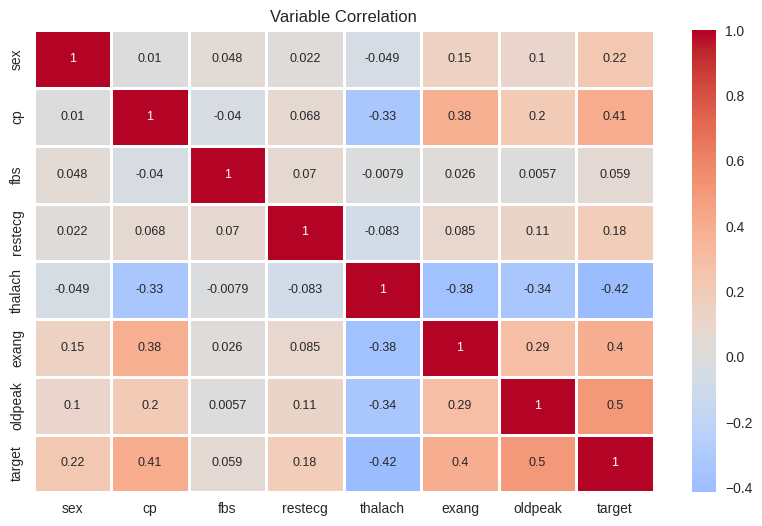

In [ ]:
#Representing Matrix as a plot where red represents direct relation and blue represents negative relation
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(df_post_drop.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical manner.

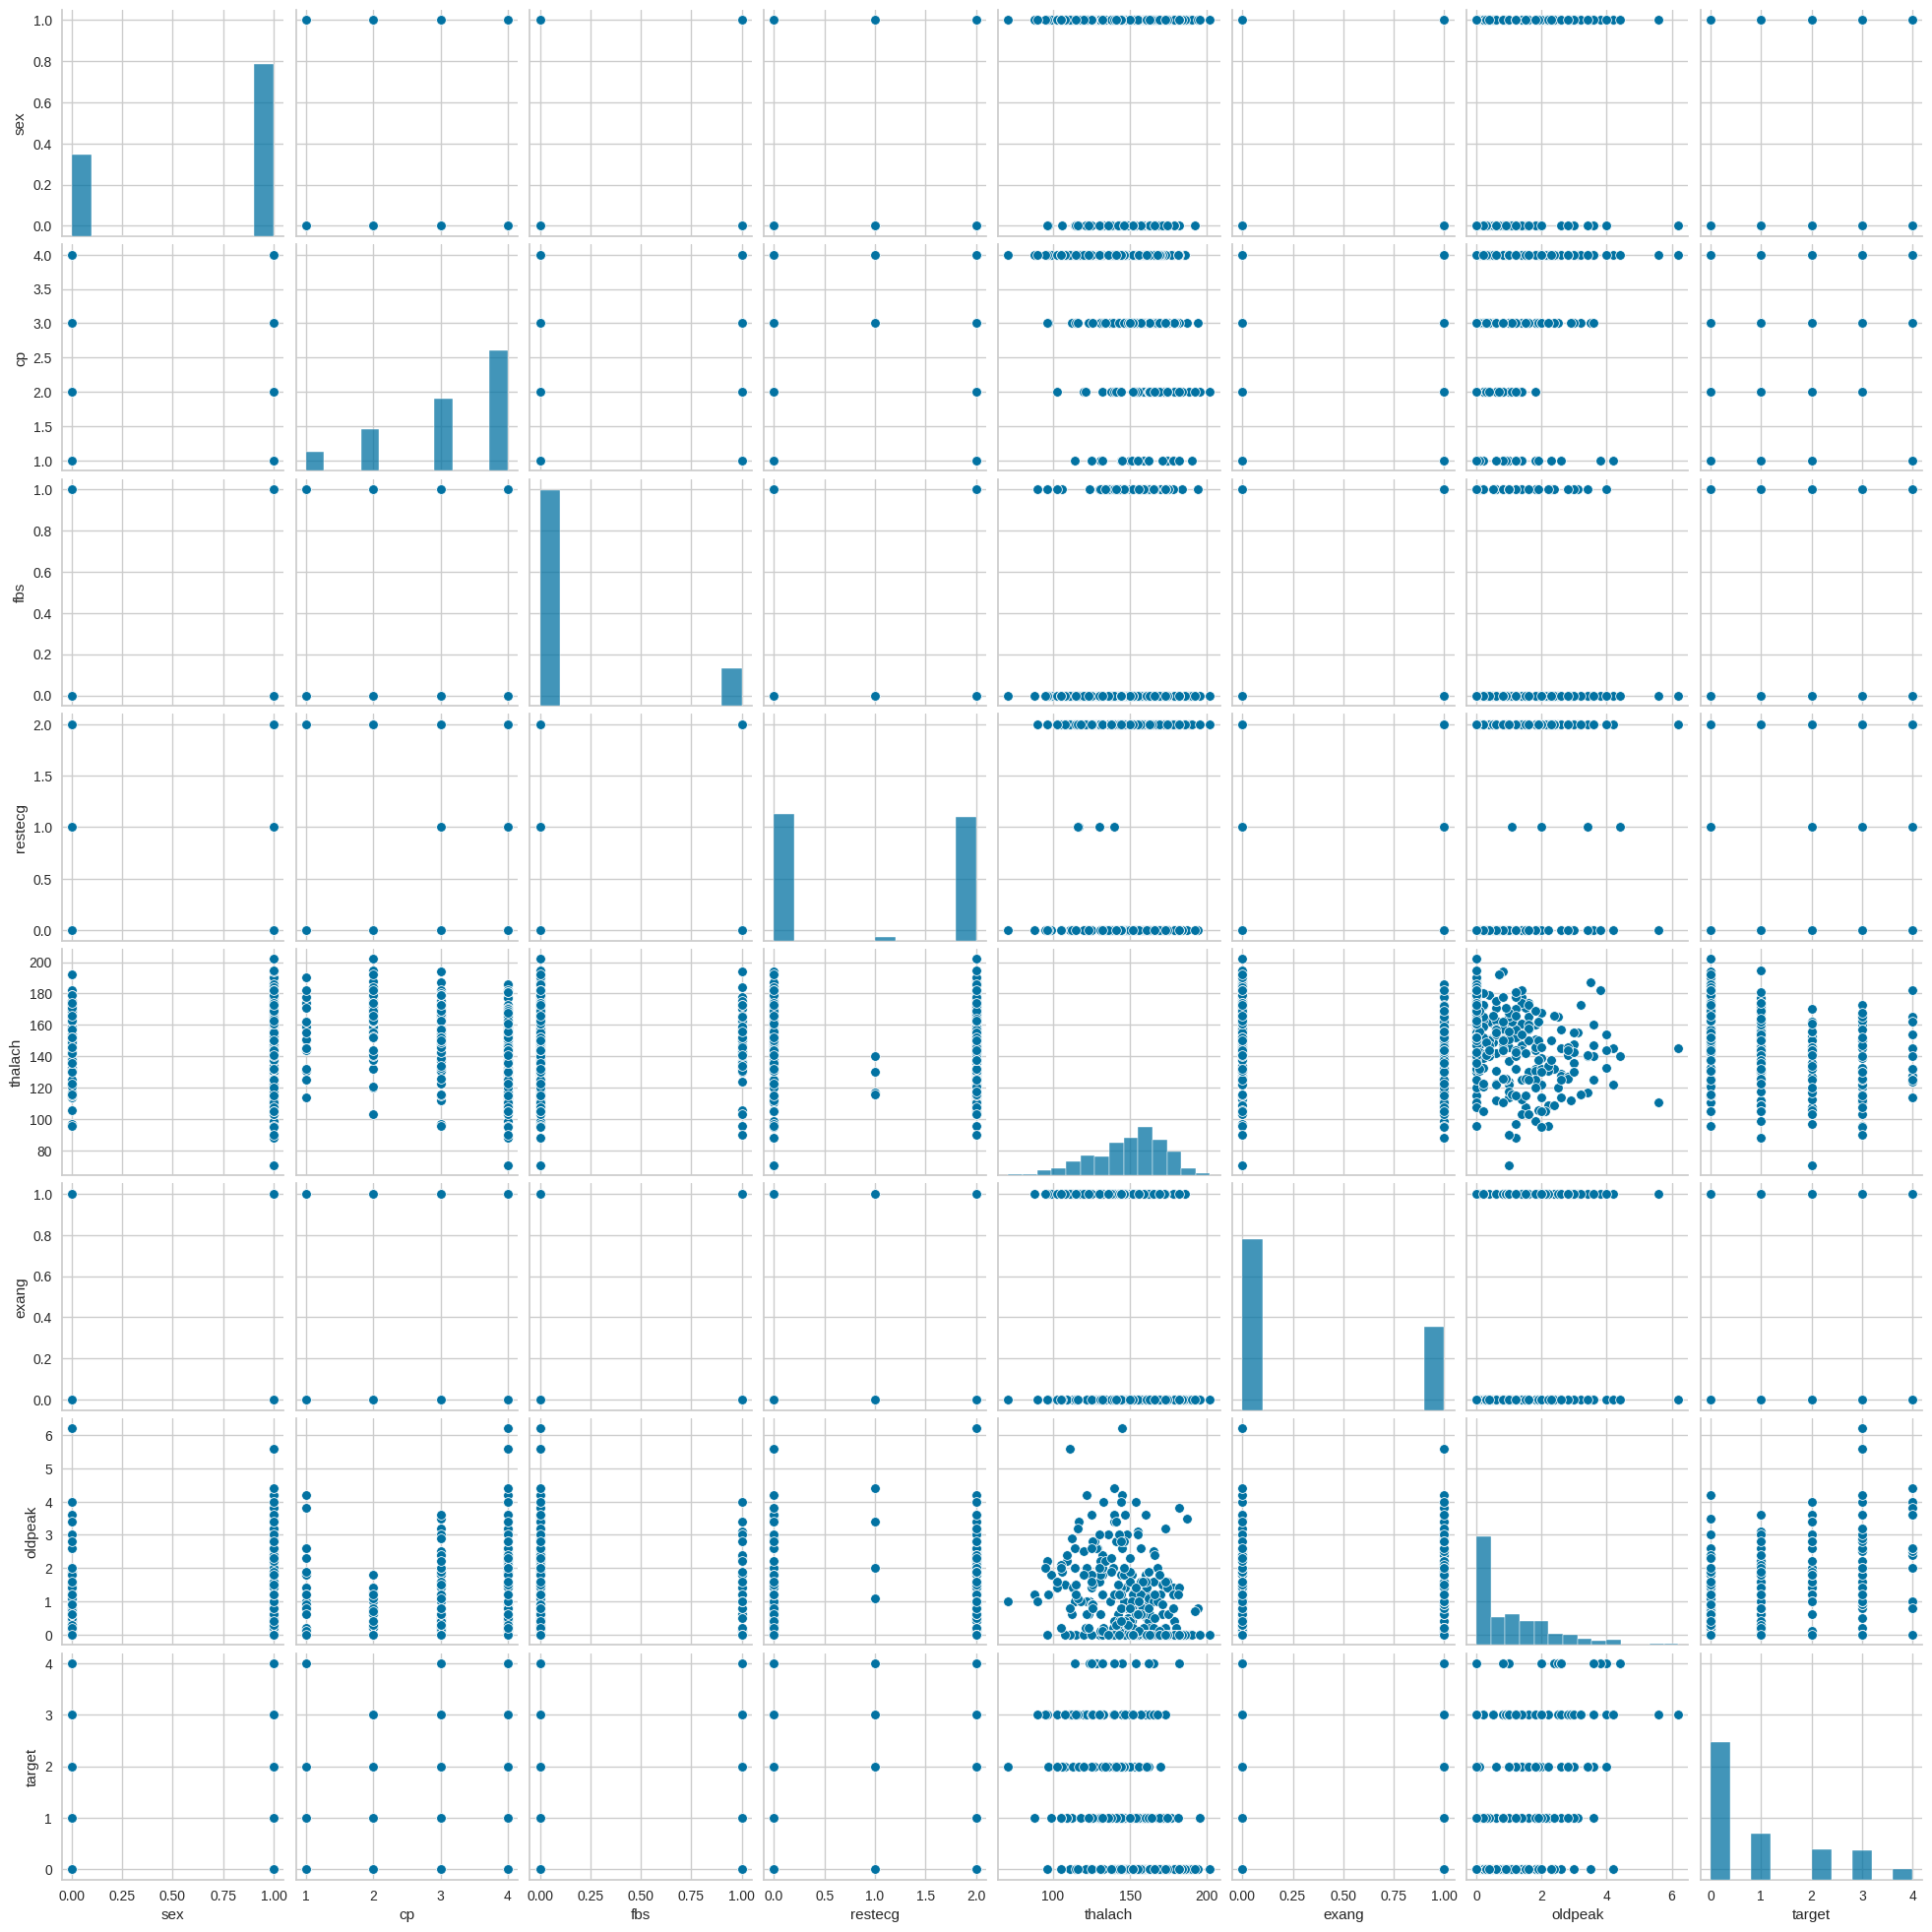

In [ ]:
sns.pairplot(df_post_drop)

When all independent variables were plotted against 'target' variable it is observed that for 'thal', 'oldpeak' and 'cp' roughly a linear line is obtained. So it can be concluded from this plot that variables Landsize and BuildingArea have linear relation with target.

**H20 AutoML Re-execution on new model**

Dropping the variables that are not significant for determining target. Passing this new model again through H20AutoML. Here, we are repeating the entire process exactly as above whilst ignoring the unecessary features.

In [ ]:
df1=df.drop(['age', 'trestbps', 'chol', 'slope'], axis=1)

In [ ]:
df1_train, df1_test = df1.split_frame([pct_rows])

In [ ]:
X1=df1.columns
print(X1)

['sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'target']


In [ ]:
#Seperate Dependent variable from Independent variable
y1_numeric ='target'
X1.remove(y1_numeric)
print(X1)

['sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']


In [ ]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml1.train(x=X1,y=y1_numeric,training_frame=df1_train)

AutoML progress: |█
02:07:02.88: GBM_1_AutoML_2_20231103_20659 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_2_20231103_20659.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 197.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 197.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 198.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 198.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 198.0.


█████████████████████████████████████████

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_2_20231103_20659_model_2


Status of Neuron Layers: predicting target, regression, gaussian distribution, Quadratic loss, 3,101 weights/biases, 41.7 KB, 2,170 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate            rate_rms               momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  -------------------  ---------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        9        Input             20.0
    2        50       RectifierDropout  40.0       0.0   0.0   0.0146453691744763   0.006112884730100632   0.0         -0.004793528897636052  0.18348222970962524  0.4706820171854749   0.09805804491043091
    3        50       RectifierDropout  40.0       0.0   0.0   0.05453352912217379  0.08281716704368591    0.0         -0.04044616330555291   0.13911163806915283  0.8109905486698358   0.10061103105545044
    4        1        Linear                       0.0   0.0   0.00321387407137081  0.0010840673930943012  0.0         -0.00471012169495225   0.12521976232528687  0.04883054792806221  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.6536075156841807
RMSE: 0.8084599654183136
MAE: 0.5682698196565448
RMSLE: 0.36864798291027384
Mean Residual Deviance: 0.6536075156841807

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.6851802620932272
RMSE: 0.8277561610119415
MAE: 0.5988436982249367
RMSLE: 0.38816558587324623
Mean Residual Deviance: 0.6851802620932272

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.617194  0.0427361  0.61309       0.686008      0.6227        0.576708      0.587463
mean_residual_deviance  0.710351  0.144261   0.62126       0.957536      0.710519      0.660234      0.602205
mse                     0.710351  0.144261   0.62126       0.957536      0.710519      0.660234      0.602205
r2                      0.510428  0.0790935  0.462392      0.460968      0.437721      0.579739      0.611319
residual_deviance       0.710351  0.144261   0.62126       0.957536      0.710519      0.660234      0.602205
rmse                    0.839646  0.0817481  0.7882        0.978538      0.842923      0.812548      0.776019
rmsle                   0.401622  0.0369732  0.453032      0.409071      0.406757      0.350976      0.388275

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-11-03 02:10:07  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2023-11-03 02:10:07  22.126 sec  23875 obs/sec     0.773279  1             191        0.859934         0.739487             0.661356        0.502598
    2023-11-03 02:10:07  22.187 sec  32878 obs/sec     8.78543   11            2170       0.80846          0.653608             0.56827         0.560363

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
ca          1                      1                    0.137827
thal        0.864183               0.864183             0.119108
fbs         0.825399               0.825399             0.113763
cp          0.816836       

In [ ]:
print(aml1.leaderboard)

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
DeepLearning_grid_2_AutoML_2_20231103_20659_model_2     0.827756  0.68518   0.598844  0.388166                  0.68518
GLM_1_AutoML_2_20231103_20659                           0.834833  0.696947  0.63101   0.406958                  0.696947
StackedEnsemble_BestOfFamily_7_AutoML_2_20231103_20659  0.835072  0.697346  0.606849  0.391685                  0.697346
GBM_grid_1_AutoML_2_20231103_20659_model_9              0.836365  0.699507  0.606329  0.391153                  0.699507
GBM_grid_1_AutoML_2_20231103_20659_model_10             0.836442  0.699635  0.613531  0.396318                  0.699635
DeepLearning_grid_3_AutoML_2_20231103_20659_model_1     0.838701  0.703419  0.600017  0.396618                  0.703419
StackedEnsemble_BestOfFamily_1_AutoML_2_20231103_20659  0.838714  0.703441  0.626066  0.401161                  0.703441
StackedEnsemble_AllModels_6_AutoM

In [ ]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

{'DeepLearning_grid_2_AutoML_2_20231103_20659_model_2': 0,
 'GLM_1_AutoML_2_20231103_20659': 1}

In [ ]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

0


In [ ]:
best_model1.algo

'deeplearning'

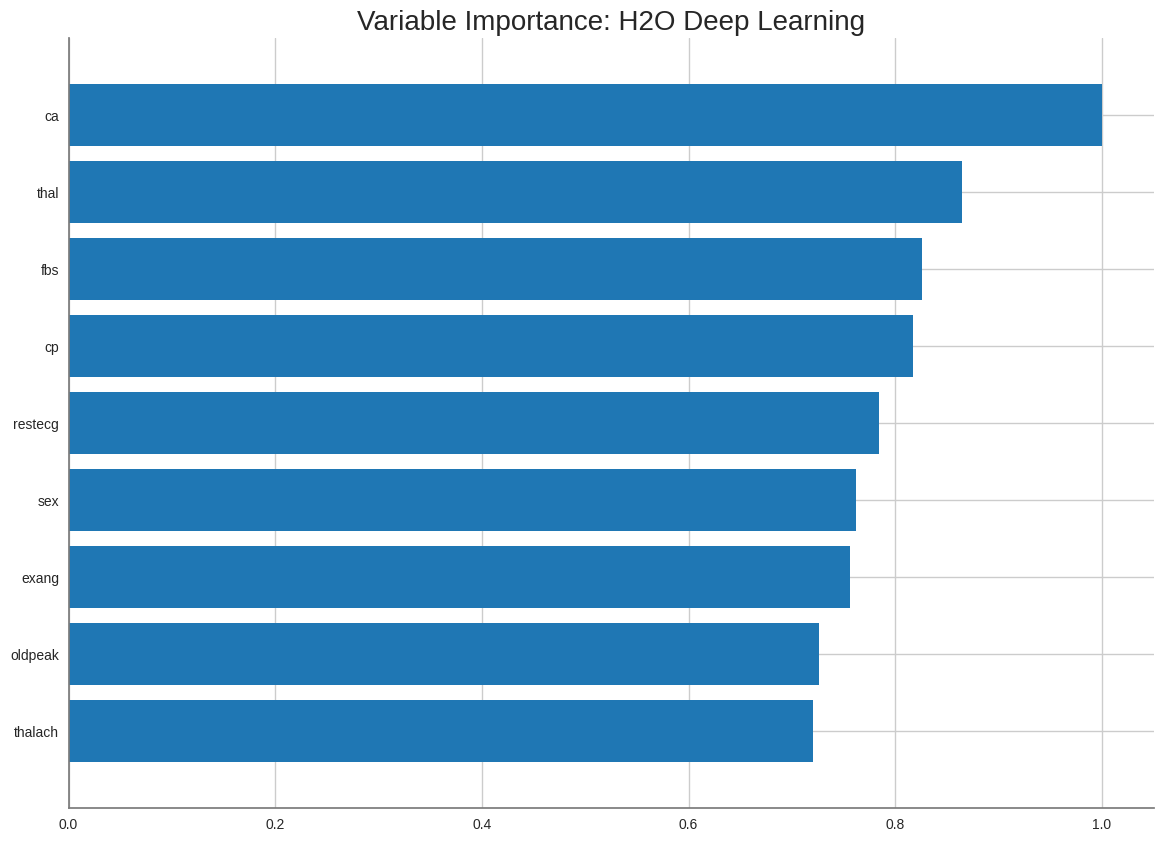

<Figure size 800x550 with 0 Axes>

In [ ]:
#plot variables in order of their importance for heart-disease prediction
if best_model1.algo in ['deeplearning','gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

1
glm


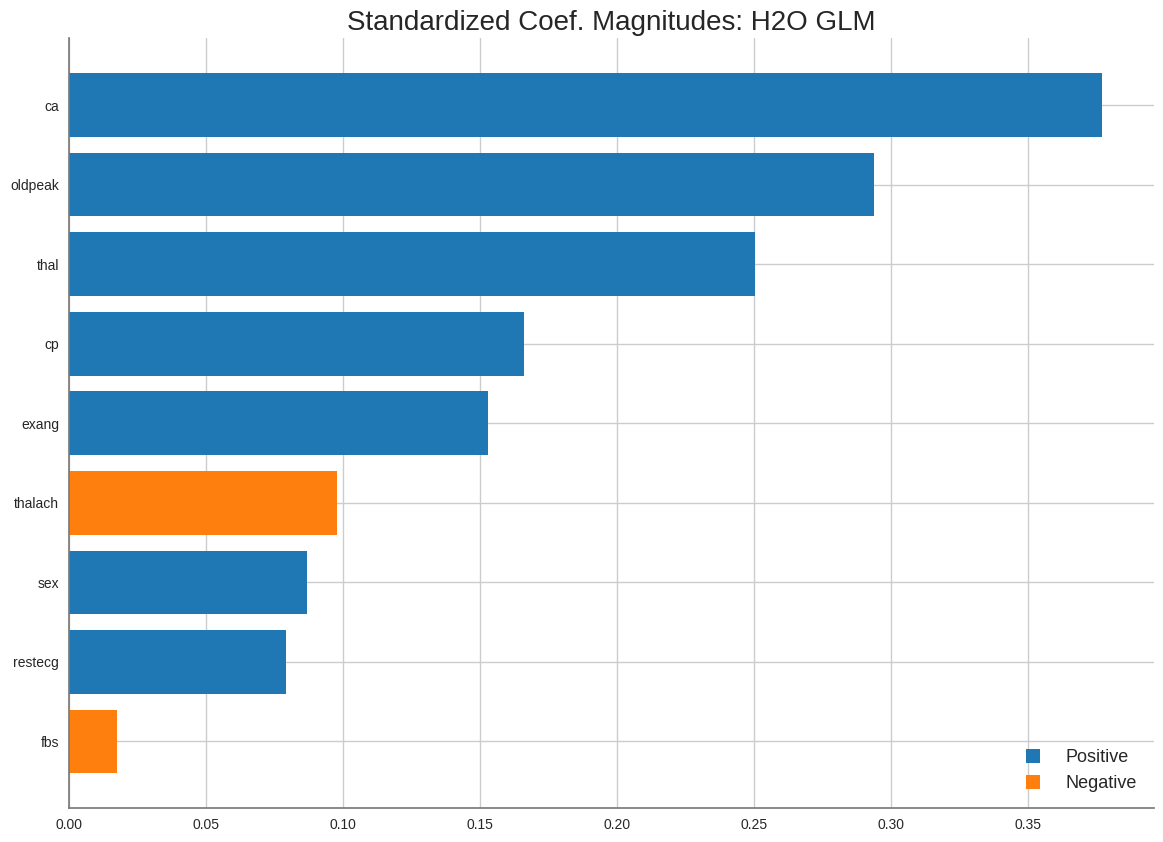

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo)
  glm_model1.std_coef_plot()

From the above plot we can see that ca, oldpeak, thal, cp, exang, sex and restecg constitute to be important variables.

**Checking if assumptions violated**

Checking if the model has violated any assumptions. For linear regression some of the assumptions are:

(1)There needs to be linear relation between the independent and dependent variable.

(2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.

(3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.

(4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.

In [ ]:
A=df_post_drop.drop(['target'],axis=1)
B=df_post_drop['target']

In [ ]:
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

In [ ]:
A_train = A_train.replace('?', 0)

Here we are check if the Homoscedasticity (normality of the error distribution) assumption is satisfies. A normal distribution of errors is expected.

In [ ]:
cols1 = ['sex','cp','fbs','restecg','thalach','exang','oldpeak','ca','thal']
model1 = sm.OLS((b_train.astype(float)),sm.add_constant(A_train[cols1].astype(float))).fit()

In [ ]:
b_pred = model1.predict(sm.add_constant(A_train[cols1].astype(float)))

In [ ]:
residuals = b_train.astype(float)-b_pred.astype(float)
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 3.226069549241364e-15


This value of the residuals in a regression analysis is approximately
3.226*10^-15 , which is a very small number close to zero. Residuals in regression analysis represent the differences between the observed values and the values predicted by the regression model.

In an ideal scenario, where the regression model perfectly fits the data, the residuals would be exactly zero because the predicted values would match the observed values perfectly. However, in real-world scenarios, it's rare to have a perfect fit due to various factors like measurement errors or the inherent complexity of the data.

Having a mean of residuals close to zero suggests that, on average, the model predictions are accurate, and the residuals are distributed around zero, indicating that the model is doing a good job of capturing the underlying patterns in the data. It's a positive sign, indicating that the regression model is performing well, at least in terms of bias (the average error).

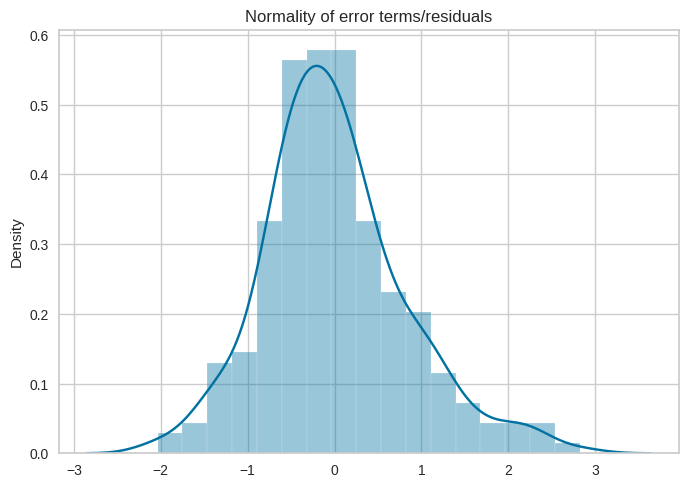

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

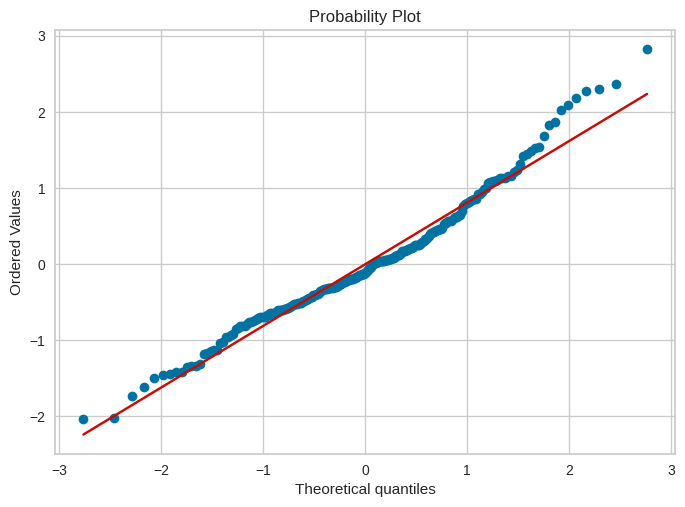

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='target', ylabel='Count'>

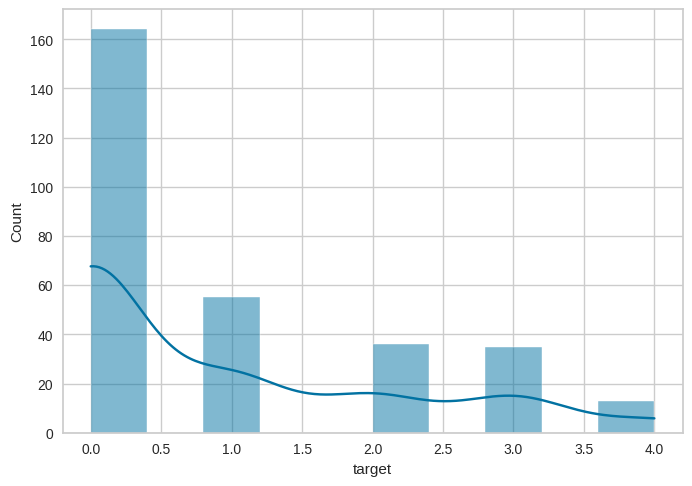

In [ ]:
sns.histplot(dfpd.target, kde = True)

Ideally for the scatterplot the result should be scattered and it should not have any particular pattern. When the same is plotted as distplot it should follow a bell curve pattern.Both the plots give the expected result so even this assumptions are satisfied.

**Ridge Regularization in H20**

The main purpose of regression is to find patterns in this underlying dataset and generalize it to predict the corresponding target value for some new values of independent values. But sometimes target dataset is inflicted with some random noise. Although there may not be error for training set it will give huge errors in predicting the correct target values for test dataset.To avoid this condition regularization is used. Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. For this model, Ridge Regularization is used.

Here, we use H2OGeneralizedLinearEstimator which would enable us to fit a generalized linear model, specified by a response variable, a set of predictors and a description of the error distribution.

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [ ]:
house_glm_regularization.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698976950480_65


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  9                             9                              1                       py_9_sid_8bfc

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.651360112956509
RMSE: 0.8070688402834724
MAE: 0.6083388781696888
RMSLE: 0.3955638392308452
Mean Residual Deviance: 0.651360112956509
R^2: 0.5618748304186936
Null degrees of freedom: 246
Residual degrees of freedom: 237
Null deviance: 367.2145748987857
Residual deviance: 160.88594790025772
AIC: 617.0685580627718

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------
    2023-11-03 02:18:08  0.000 sec   0             367.2145748987857          1.4866986838007519
    2023-11-03 02:18:08  0.031 sec   1                                                            0.8070688402834724  0.651360112956509    0.6083388781696888  0.5618748304186936

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
ca          0.402649               1                    0.254811
oldpeak     0.306336               0.760801             0.19386
thal        0.261182               0.648658             0.165285
cp          0.16915                0.420093             0.107044
exang       0.157835               0.39199              0.0998835
thalach     0.0900964              0.223759             0.0570162
sex         0.0862765              0.214272             0.0545989
restecg     0.0817959              0.203144             0.0517634
fbs         0.0248678              0.0617605            0.0157372

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
house_glm.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698976950480_66


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              9                             9                              1                       py_9_sid_8bfc

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.6513598728941403
RMSE: 0.8070686915586184
MAE: 0.6083403656021179
RMSLE: 0.39561228531462483
Mean Residual Deviance: 0.6513598728941403
R^2: 0.5618749918921455
Null degrees of freedom: 246
Residual degrees of freedom: 237
Null deviance: 367.2145748987857
Residual deviance: 160.88588860485265
AIC: 617.0684670295402

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------
    2023-11-03 02:18:14  0.000 sec   0             367.2145748987857          1.4866986838007519
    2023-11-03 02:18:14  0.018 sec   1                                                            0.8070686915586184  0.6513598728941403   0.6083403656021179  0.5618749918921455

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
ca          0.403                  1                    0.254909
oldpeak     0.3065                 0.760545             0.19387
thal        0.261329               0.648458             0.165298
cp          0.169186               0.419816             0.107015
exang       0.157904               0.39182              0.0998787
thalach     0.0899798              0.223275             0.0569148
sex         0.0862605              0.214046             0.0545622
restecg     0.0818272              0.203045             0.0517581
fbs         0.0249693              0.0619585            0.0157938

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

From the above results, the accuracy and other related variables were same for both the cases. When dataset was regularized and when dataset was not regularized. This tells that for this specific model regularization does not help.

In [ ]:
exa = aml1.explain(df1_test)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
s = df_post_drop['target']
s = s.replace('?', 0)
t = df_post_drop.drop(['target'], axis = 1)
t = t.replace('?', 0)


In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [ ]:
random_rf.best_params_

{'n_estimators': 300, 'min_samples_split': 3, 'max_depth': 1100}

**Conclusion**

A fundamental algorithm based on the linear regression method to predict Heart Disease was constructed. VIF, p-values and other tests were considered to ignore some of the independent variables. H20.ai framework was used to train and test the variables of the dataset of Heart-disease. This gave the best model as deep-learning and accuracy for test data was 55.9%. From the results shown it can be concluded that the proposed linear regression model can effectively analyze and predict the heart-disease (target variable) to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research. In further research into the corresponding models, different techniques like removing outliers and using ensemble or booster can help achieve better prediction.

Assignment Question/Answers
Q1) Is the relationship significant?

A relationship is said to be statistically significant when the p value for the variables is less than 0.05 P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for 'ca', ‘thal’ and 'fbs' were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.

Q2) Are any model assumptions violated? Assumptions for linear regression are:

Linear relationship - The relationship between the dependent and independent variables should be linear while keeping other variables constant. When the target variable is plotted against each independent variable, a linear relationship is observed for a few of them, indicating that this requirement is met. Additionally, homoscedasticity, which refers to the normality of the error distribution, is essential. Residuals should form a bell-curve shape when plotted, indicating a normal distribution. In this model, this condition is satisfied.

The presence of little to no multicollinearity, which indicates the absence of strong correlations between independent variables, can be assessed using a correlation matrix. However, in this particular model, the assumption is violated as there is multicollinearity between the variables Rooms and BuildingArea.

To test for autocorrelation, the Durbin-Watson test is employed, where values between 1.5 and 2.5 suggest no autocorrelation. In this model, the value is 1.6, indicating that this assumption is not violated. Overall, the model adheres to several assumptions, but multicollinearity remains an issue due to the correlation between Rooms and BuildingArea variables.

Q3) Is there any multicollinearity in the model?

 When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model some variables had VIF value greater than 10 and p value was greater than 0.05. By dropping those columns and rechecking the values expected output was achieved. Currently high correlation exists between ca and thal.

Q4) In the multivariate models are predictor variables independent of all the other predictor variables?

Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that ca and thal are correlated to each other. Other than those other predictors are independent from each other.

Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

 From the variable importance plot, the most to least important variables are displayed. For my model ca, thal, fbs and cp are top 4 most important variables to determine target (heart-disease presence). VIF and p-values for age, chol, trestbps ,and slope were high than the ideal values. So those variables were excluded from the model.

Q6) Does the model make sense?

 For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.55 which is considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

Q7)Does regularization help?

 Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were same in both the cases. Hence it can be concluded that for this model regularization does not help.

Q8) Which independent variables are significant?

Variables are significant when p-value is less than 0.05. For this model except for  age, chol, trestbps all other variables have p-value less than 0.05. So, it can be said that all variables are significant.

Q9) Which hyperparameters are important?

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:-


{'n_estimators': 300, 'min_samples_split': 3, 'max_depth': 1100}


LICENSE
MIT License

Copyright (c) 2023 Tarun Angrish

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

REFERENCES
H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/


Professor's AutoML Notebook- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb